In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: xlabel='Outcome'>

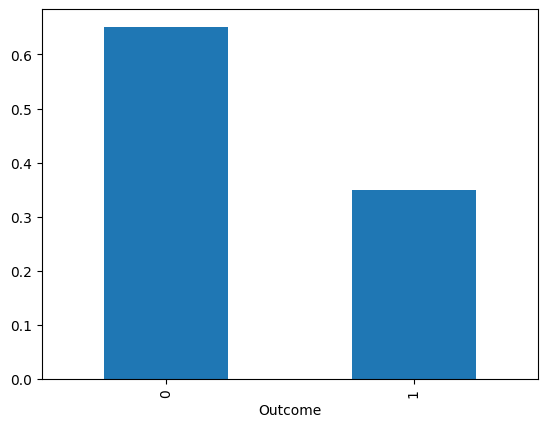

In [3]:
data.Outcome.value_counts(normalize= True).plot(kind= "bar")

In [4]:
x = data.drop("Outcome", axis = 1).to_numpy()
Y = data['Outcome'].to_numpy()

In [5]:
x.shape

(768, 8)

### Data Preprocessing

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [7]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, test_size= 0.25, random_state=898, stratify= Y)


In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
log_regression = LogisticRegression()
log_regression.fit(x_train, y_train)

LogisticRegression()

In [11]:
y_pred = log_regression.predict(x_test)

### Evaluation Metrics

### Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
matrix = confusion_matrix(y_test, y_pred, labels= [0, 1])
# matrix = confusion_matrix(y_test, y_pred, labels= [0, 1], normalize= "all")
matrix

array([[112,  13],
       [ 33,  34]])

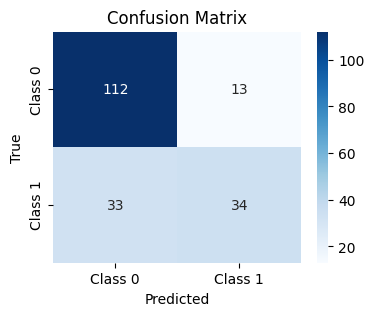

In [14]:
plt.figure(figsize=(4, 3))    ## f for float and d for int
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



### Accuracy

In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7604166666666666

### Accuracy Paradox

### Precision and Recall

In [20]:
from sklearn.metrics import precision_score, recall_score

print("Precision score: ", precision_score(y_test, y_pred))

print("Recall score: ", recall_score(y_test, y_pred))

Precision score:  0.723404255319149
Recall score:  0.5074626865671642


### F1 Score

In [21]:
from sklearn.metrics import f1_score

In [22]:
f1_score(y_test, y_pred)

0.5964912280701754